## Sierra Leone Solar Potential Analysis

This notebook explores the solar energy potential of **Sierra Leone** as part of the 10 Academy Week 0 challenge.  
Our goal is to:
- Perform data profiling and cleaning
- Analyze key variables such as **Global Horizontal Irradiance (GHI)**, **Direct Normal Irradiance (DNI)**, and **temperature**
- Generate visualizations to uncover patterns and insights
These steps help us evaluate the country's suitability for solar energy deployment and compare it with other countries like Togo and Benin.

import pandas as pd

df = pd.read_csv('../data/sierra_leone-bumbuna.csv')  # adjust filename if different
df.head()


In [2]:
import pandas as pd

df = pd.read_csv('../data/sierraleone-bumbuna.csv')  # adjust filename if different
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
missing_values = df.isna().sum()
missing_values_percent = (missing_values / len(df)) * 100
print(missing_values)
print(missing_values_percent)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [5]:
cols_more_than_5_percent_missing = missing_values_percent[missing_values_percent > 5]
print(cols_more_than_5_percent_missing)


Comments    100.0
dtype: float64


In [6]:
from scipy import stats
import numpy as np

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers_count = (z_scores > 3).sum(axis=0)
print(outliers_count)


[2477 7586 2986 1604 2041 3967 3665]


In [7]:
# Remove rows with any outlier in these columns
df_clean = df[(z_scores < 3).all(axis=1)]

# For missing values, fill with median of each column
for col in cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)


C:\Users\saron\AppData\Local\Temp\ipykernel_3168\3400597263.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
C:\Users\saron\AppData\Local\Temp\ipykernel_3168\3400597263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(median_val, inplace=True)
C:\Users\saron\AppData\Loca

In [8]:
df_clean.to_csv('../data/sierra_leone_clean.csv', index=False)


C:\Users\saron\AppData\Local\Temp\ipykernel_3168\3939675355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
C:\Users\saron\OneDrive\Desktop\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


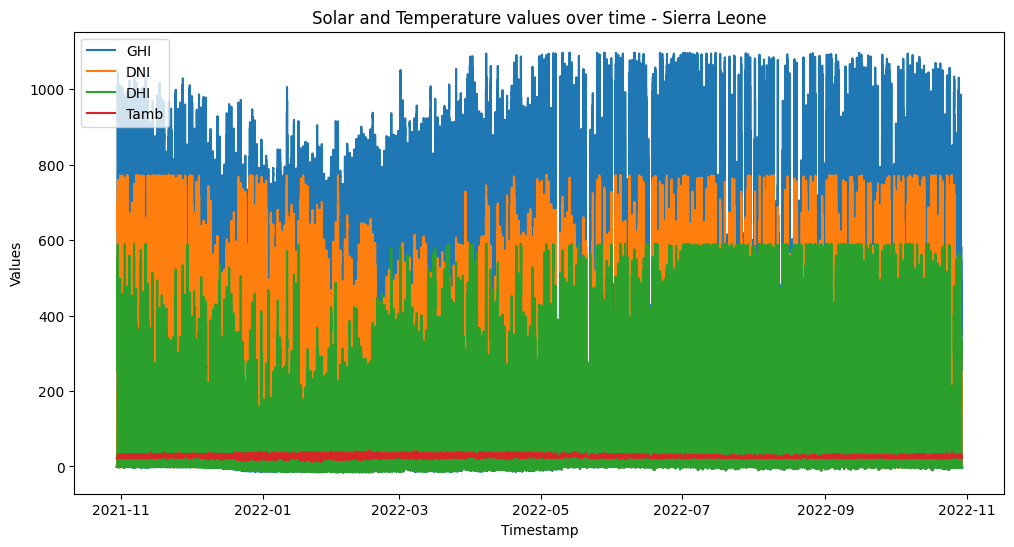

In [9]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(12,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Solar and Temperature values over time - Sierra Leone')
plt.show()


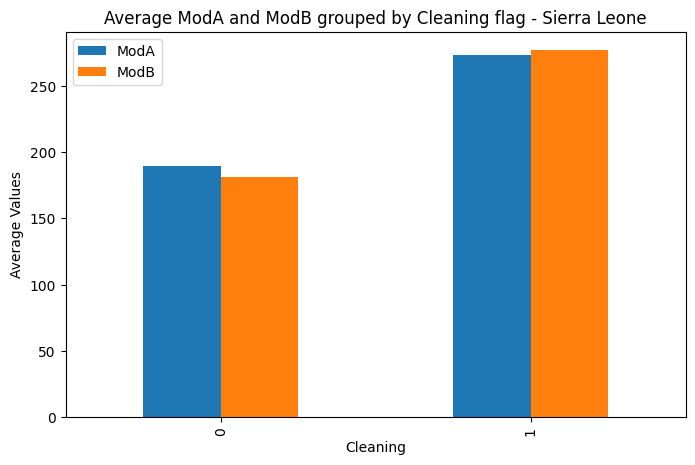

In [10]:
grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

grouped.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA and ModB grouped by Cleaning flag - Sierra Leone')
plt.ylabel('Average Values')
plt.show()


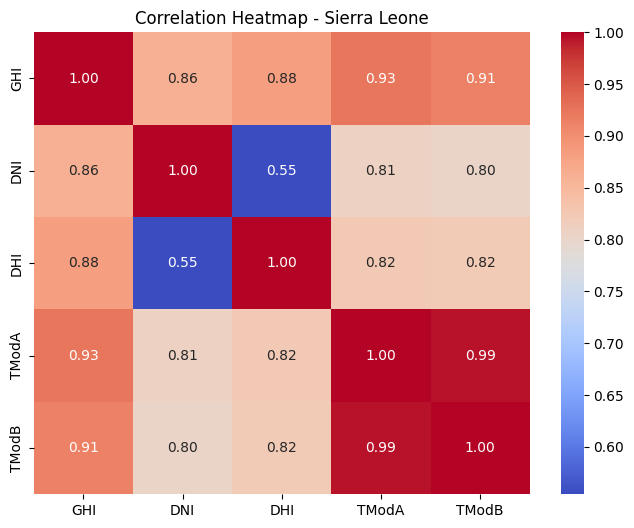

In [11]:
import seaborn as sns

corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Sierra Leone')
plt.show()


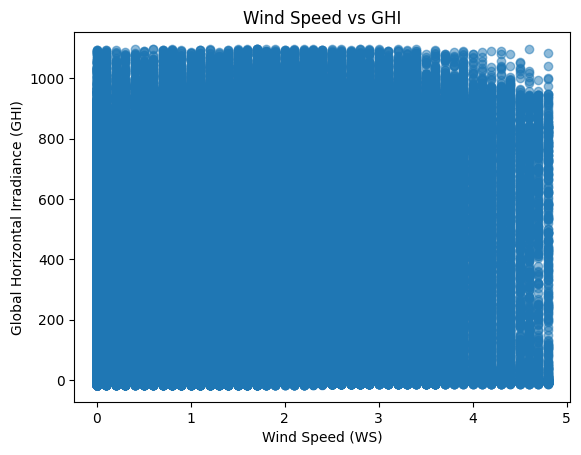

In [12]:
plt.scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Wind Speed vs GHI')
plt.show()


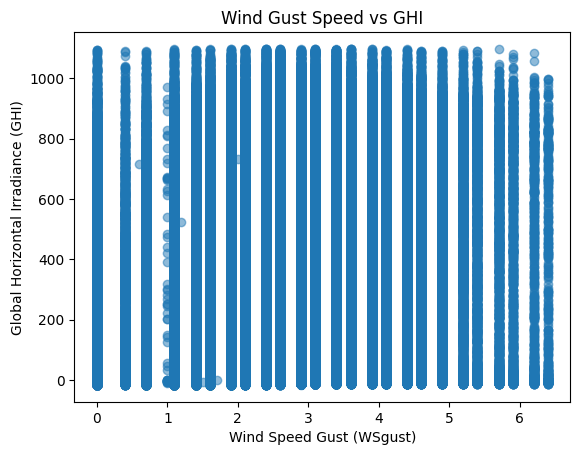

In [13]:
plt.scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.5)
plt.xlabel('Wind Speed Gust (WSgust)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Wind Gust Speed vs GHI')
plt.show()


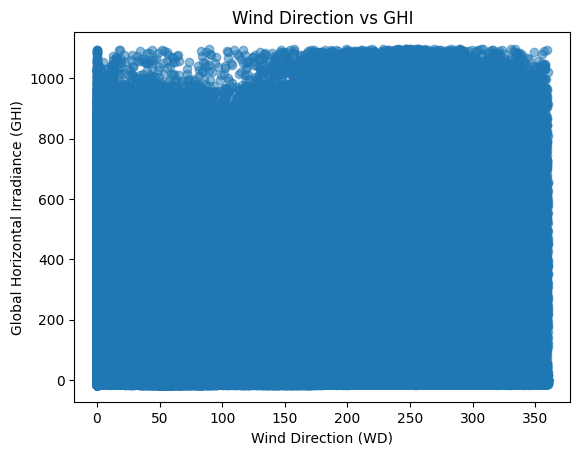

In [14]:
plt.scatter(df_clean['WD'], df_clean['GHI'], alpha=0.5)
plt.xlabel('Wind Direction (WD)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Wind Direction vs GHI')
plt.show()


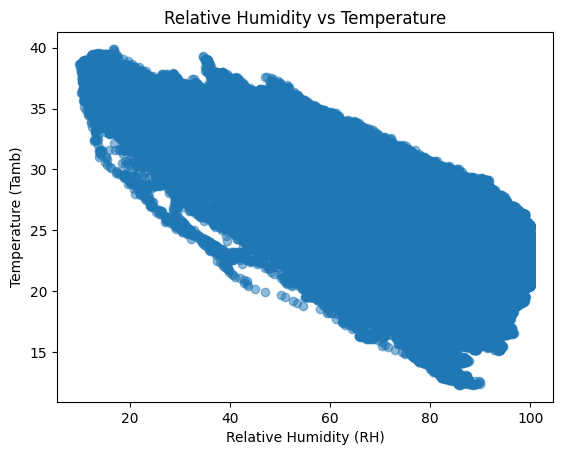

In [15]:
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')
plt.title('Relative Humidity vs Temperature')
plt.show()


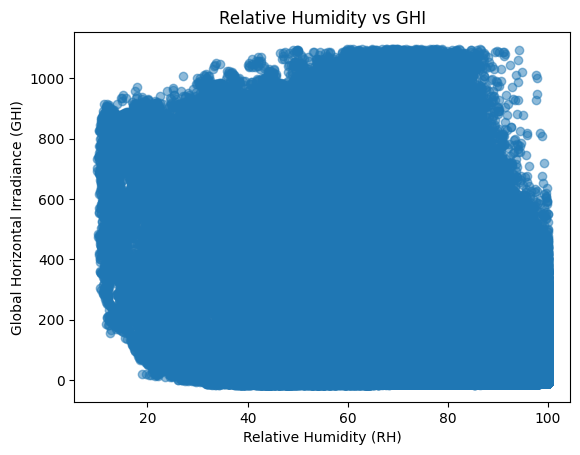

In [16]:
plt.scatter(df_clean['RH'], df_clean['GHI'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Relative Humidity vs GHI')
plt.show()


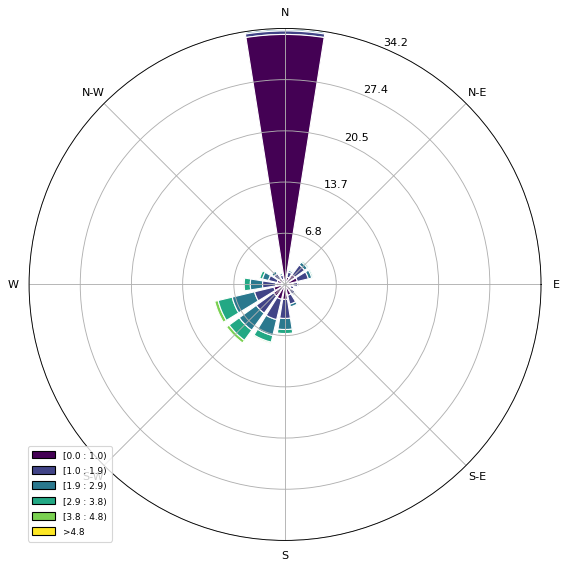

In [17]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


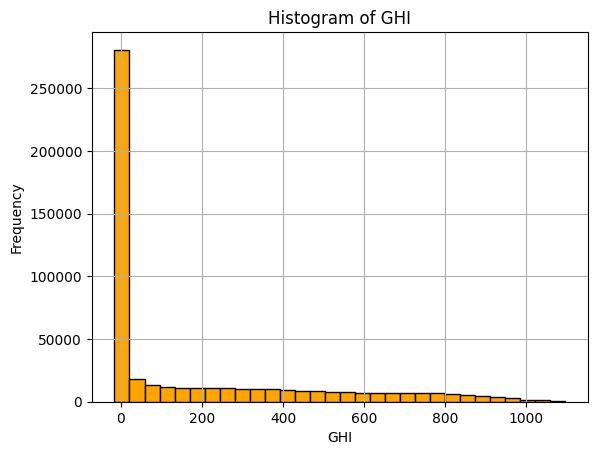

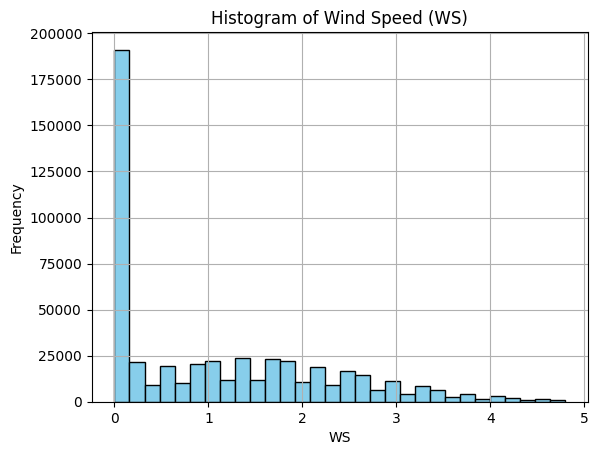

In [18]:
# Histogram of GHI
df_clean['GHI'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram of WS (Wind Speed)
df_clean['WS'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()


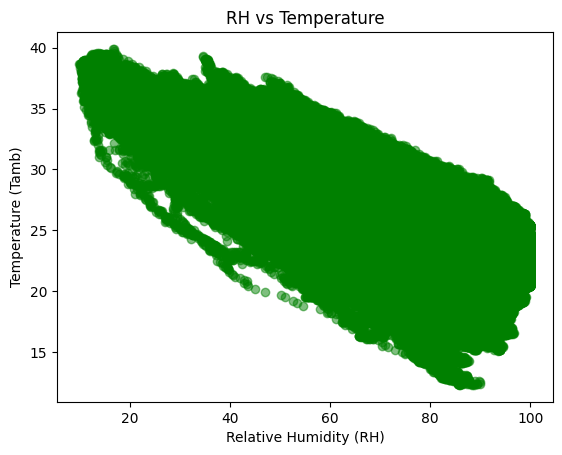

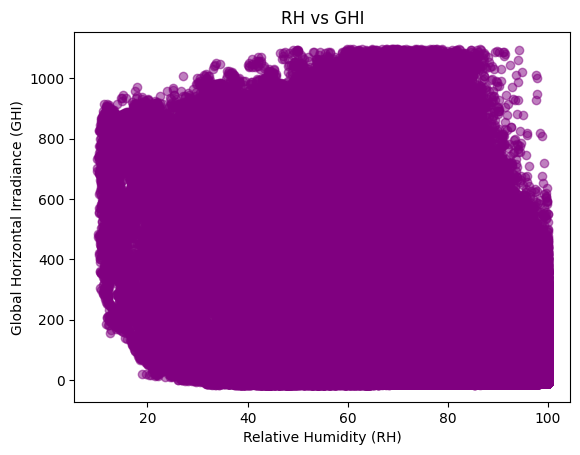

In [19]:
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')
plt.title('RH vs Temperature')
plt.show()

plt.scatter(df_clean['RH'], df_clean['GHI'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('RH vs GHI')
plt.show()


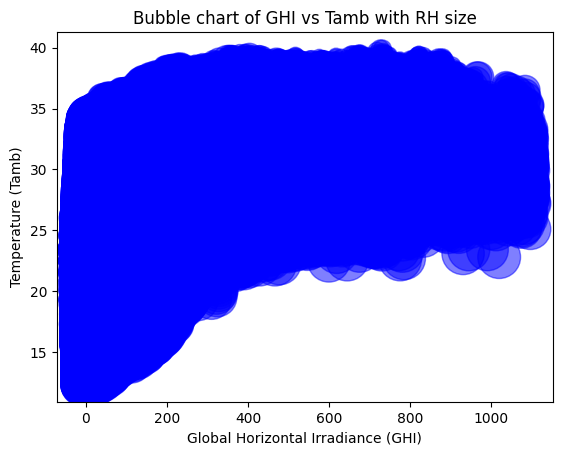

In [20]:
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH']*10, alpha=0.5, color='blue')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.title('Bubble chart of GHI vs Tamb with RH size')
plt.show()
